### Ejercicios derivadas multivariable con python

1) **Calcule las derivadas parciales de la función $f(x,y)=x^2-3xy+2y^2-4x+5y-12$**

In [61]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D

In [62]:
# Definicion de variables
x, y, z = sp.symbols('x y z')

# Definir la función de dos variables
f = sp.log(x**2 + y**2 + z**2)

# Calcular la derivada parciales
derivada_x = sp.diff(f, x) # parcial de x
derivada_y = sp.diff(f, y) # parcial de y
derivada_z = sp.diff(f, z) # parcial de z


# Resultado parciales

# Parcial con respecto a x
display(Math(r"\dfrac{\partial f}{\partial x} = " + sp.latex(derivada_x)))

# Parcial con respecto a y
display(Math(r"\dfrac{\partial f}{\partial y} = " + sp.latex(derivada_y)))

# Parcial con respecto a z
display(Math(r"\dfrac{\partial f}{\partial z} = " + sp.latex(derivada_z)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

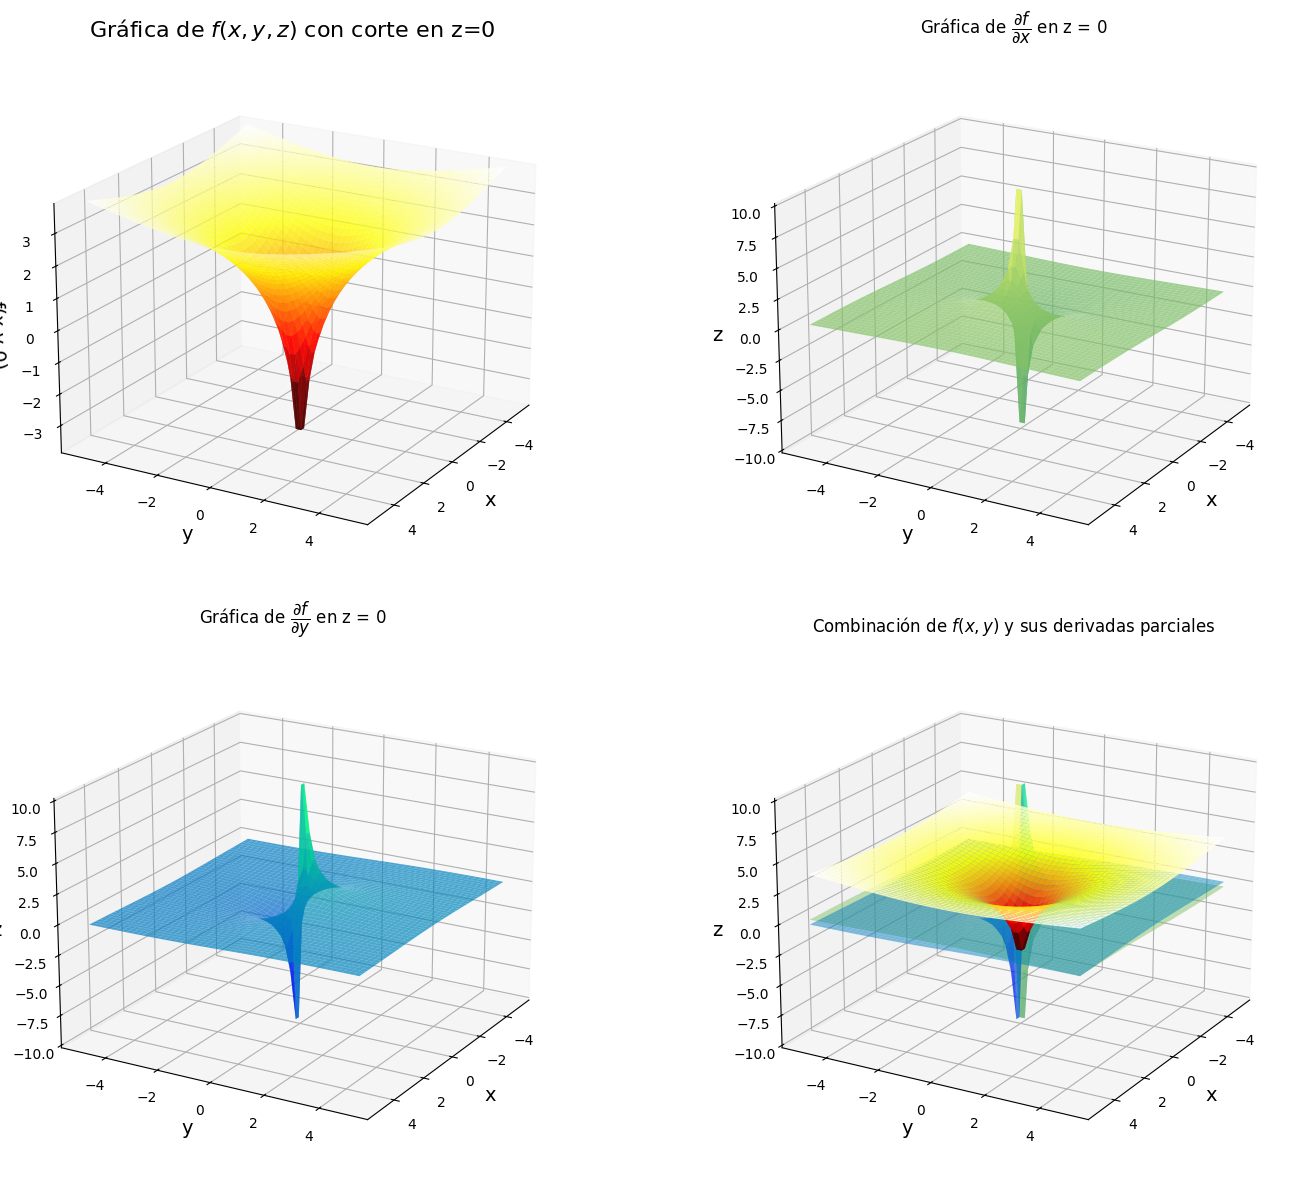

In [75]:
# Grafica de f(x) y f'(x)

# Conversión de cálculo simbólico a numérico
f_num = sp.lambdify([x, y, z], f, 'numpy')
f_x = sp.lambdify([x, y, z], derivada_x, 'numpy')
f_y = sp.lambdify([x, y, z], derivada_y, 'numpy')
f_z = sp.lambdify([x, y, z], derivada_z, 'numpy')

# Generar datos para graficar
x_values = np.linspace(-5, 5, 50)  # Ajuste del rango de x
y_values = np.linspace(-5, 5, 50)  # Ajuste del rango de y

X, Y = np.meshgrid(x_values, y_values)
Z = np.zeros_like(X)

# Evaluar las funciones en los puntos correspondientes
F = f_num(X, Y, Z)
f_x_values = f_x(X, Y, Z)
f_y_values = f_y(X, Y, Z)
f_z_values = f_z(X, Y, Z)

# Plotear
fig = plt.figure(figsize=(16, 12))

# Graficar la funcion en 3D (Corte en Z = 0)
plt_3d = fig.add_subplot(221, projection='3d')
plt_3d.plot_surface(X, Y, F, cmap='hot', edgecolor="none", alpha=0.8)
plt_3d.set_title('Gráfica de $f(x,y,z)$ con corte en z=0', fontsize=16)

# Labels
plt_3d.set_xlabel('x', fontsize=14)
plt_3d.set_ylabel('y', fontsize=14)
plt_3d.set_zlabel('f(x,y,0)', fontsize=14)
plt_3d.set_zlim(np.min(F), np.max(F))

plt_3d.view_init(elev=20, azim=30)

# -----------------------------------------------

# Graficar la derivada parcial respecto a x
plt_3d_fx = fig.add_subplot(222, projection='3d')
surface_dx = plt_3d_fx.plot_surface(X, Y, f_x_values, edgecolor='none', cmap='summer', alpha=0.7)
plt_3d_fx.set_title(r'Gráfica de $\dfrac{\partial f}{\partial x}$ en z = 0')
plt_3d_fx.set_xlabel('x', fontsize=14)
plt_3d_fx.set_ylabel('y', fontsize=14)
plt_3d_fx.set_zlabel('z', fontsize=14)
plt_3d_fx.view_init(elev=20, azim=30)

# -----------------------------------------------

# Graficar la derivada parcial respecto a y
plt_3d_fy = fig.add_subplot(223, projection='3d')
surface_dy = plt_3d_fy.plot_surface(X, Y, f_y_values, edgecolor='none', cmap='winter', alpha=0.7)
plt_3d_fy.set_title(r'Gráfica de $\dfrac{\partial f}{\partial y}$ en z = 0')
plt_3d_fy.set_xlabel('x', fontsize=14)
plt_3d_fy.set_ylabel('y', fontsize=14)
plt_3d_fy.set_zlabel('z', fontsize=14)
plt_3d_fy.view_init(elev=20, azim=30)

# -----------------------------------------------

# Graficar la combinación de la función y sus derivadas parciales
plt_3d_combined = fig.add_subplot(224, projection='3d')

# Graficar la función original
plt_3d_combined.plot_surface(X, Y, F, cmap='hot', edgecolor='none', alpha=0.9)

# Graficar la derivada parcial respecto a x
plt_3d_combined.plot_surface(X, Y, f_x_values, cmap='summer', edgecolor='none', alpha=0.5)

# Graficar la derivada parcial respecto a y
plt_3d_combined.plot_surface(X, Y, f_y_values, cmap='winter', edgecolor='none', alpha=0.5)

plt_3d_combined.set_title('Combinación de $f(x,y)$ y sus derivadas parciales')
plt_3d_combined.set_xlabel('x', fontsize=14)
plt_3d_combined.set_ylabel('y', fontsize=14)
plt_3d_combined.set_zlabel('z', fontsize=14)
plt_3d_combined.view_init(elev=20, azim=30)

# -----------------------------------------------

plt.tight_layout()
plt.show()